In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Variance Threshold
removes features that are below the variance threshold values

In [2]:
data = pd.read_csv('Data/santander.csv',nrows=10000)


TypeError: rolling() missing 1 required positional argument: 'window'

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(labels = ['TARGET'],axis = 1),data['TARGET'],test_size=0.3,random_state=0)

In [5]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0) ### will remove 0 variance features
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [6]:
len(X_train.columns[var_thres.get_support()])

284

In [7]:
sum(var_thres.get_support())  #constant features

284

In [8]:
constant_columns= [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
len(constant_columns)    #non constant features

86

# Pearson correlation
Removes features that are highly correlated

In [39]:
from sklearn.datasets import load_boston
import warnings
from sklearn.feature_selection import r_regression

In [18]:
data = load_boston()
warnings.filterwarnings('ignore')
df = pd.DataFrame(data.data,columns = data.feature_names)

In [29]:
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
X = df.drop('MEDV',axis = 1)
y = df['MEDV']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [44]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train,0.7)
corr_features

{'AGE', 'NOX', 'TAX'}

In [49]:
X_train.drop(corr_features,axis = 1)
X_test.drop(corr_features,axis = 1).head(2)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,1.1691,24.0,20.2,366.15,9.53


# Information Gain Classification
mutual information I(X;Y) = H(X)-H(X/Y)   H() - entropy

In [50]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [54]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(labels = ['Wine'],axis = 1),df['Wine'],test_size=0.7,random_state=0)

In [56]:
from sklearn.feature_selection import mutual_info_classif

In [57]:
mutual_info = mutual_info_classif(X_train,y_train)

In [58]:
mutual_info

array([0.55970343, 0.30109499, 0.07741252, 0.40269942, 0.19536036,
       0.55489197, 0.7073845 , 0.09325177, 0.41514859, 0.6298021 ,
       0.47125072, 0.63503384, 0.64183582])

In [59]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.707385
Proline                 0.641836
OD                      0.635034
Color.int               0.629802
Alcohol                 0.559703
Phenols                 0.554892
Hue                     0.471251
Proanth                 0.415149
Acl                     0.402699
Malic.acid              0.301095
Mg                      0.195360
Nonflavanoid.phenols    0.093252
Ash                     0.077413
dtype: float64

<AxesSubplot:>

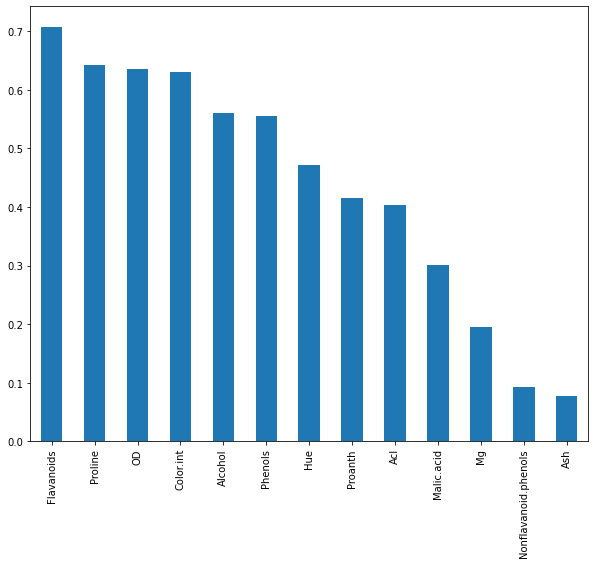

In [63]:
mutual_info.sort_values(ascending=False).plot.bar(figsize = (10,8))

In [64]:
from sklearn.feature_selection import SelectKBest

In [65]:
sel_five_columns = SelectKBest(mutual_info_classif,k=5)
sel_five_columns.fit(X_train,y_train)
X_train.columns[sel_five_columns.get_support()]

Index(['Phenols', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

In [66]:
sel_five_columns

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x000002A00210F940>)

# Information Gain Regression


In [67]:
housing_df = pd.read_csv('Data/housing_data.csv')

In [71]:
numeric_list = ['int64','float64']
numerical_cols = list(housing_df.select_dtypes(include = numeric_list).columns)


In [72]:
df = housing_df[numerical_cols]

In [74]:
df.drop(labels='Id',axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [77]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)


In [78]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,...,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,...,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,...,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [79]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [80]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.24508674, 0.21029118, 0.1639955 , 0.53156677,
       0.10123207, 0.34595289, 0.23997624, 0.09653564, 0.1609626 ,
       0.01609732, 0.1105783 , 0.38200547, 0.31199367, 0.2276522 ,
       0.00753431, 0.47898549, 0.01323267, 0.        , 0.26862469,
       0.08053523, 0.04454926, 0.02926845, 0.18832567, 0.17807354,
       0.2719908 , 0.37044899, 0.36405846, 0.06362789, 0.17293331,
       0.01052047, 0.00941144, 0.03039291, 0.00621739, 0.00296349,
       0.        , 0.00214527])

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.531567
GrLivArea        0.478985
TotalBsmtSF      0.382005
GarageCars       0.370449
GarageArea       0.364058
YearBuilt        0.345953
1stFlrSF         0.311994
GarageYrBlt      0.271991
FullBath         0.268625
MSSubClass       0.245087
YearRemodAdd     0.239976
2ndFlrSF         0.227652
LotFrontage      0.210291
TotRmsAbvGrd     0.188326
Fireplaces       0.178074
OpenPorchSF      0.172933
LotArea          0.163996
BsmtFinSF1       0.160963
BsmtUnfSF        0.110578
OverallCond      0.101232
MasVnrArea       0.096536
HalfBath         0.080535
WoodDeckSF       0.063628
BedroomAbvGr     0.044549
ScreenPorch      0.030393
KitchenAbvGr     0.029268
BsmtFinSF2       0.016097
BsmtFullBath     0.013233
EnclosedPorch    0.010520
3SsnPorch        0.009411
LowQualFinSF     0.007534
PoolArea         0.006217
MiscVal          0.002963
YrSold           0.002145
MoSold           0.000000
Id               0.000000
BsmtHalfBath     0.000000
dtype: float64

In [83]:
from sklearn.feature_selection import SelectPercentile

In [84]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_top_columns.get_support()
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea'],
      dtype='object')

# Chi2
Test relationship between categorical values or non-negative features with the test subject

In [148]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [149]:
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [150]:
# Label encoding
original_label = {k: i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked'] = df['embarked'].map(original_label)
df['sex']=np.where(df['sex']=='female',1,0)
df['alone']=np.where(df['alone']==True,1,0)
df['sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int32

In [151]:
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [152]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([120.31252684,   7.55053653,  10.88471585,  21.97994154]),
 array([5.40398040e-28, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [154]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values


sex         5.403980e-28
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [155]:
p_values.sort_index(ascending=False)

sex         5.403980e-28
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

# Fisher's Score
derivate of log of likelihood function

In [158]:
df=sns.load_dataset('titanic')
df.info()
df = df.drop(['age','deck'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Forward Feature Selection
We start with best performing variable agianst the target. Then we select another variable that gives the best performance when combined with this variable. This goes on until the preset criterion is achieved

In [167]:
from sklearn.feature_selection._sequential import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [168]:
X,y = load_iris(return_X_y=True)

In [171]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn,n_features_to_select=3,direction='backward')
sfs.fit(X,y)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [172]:
sfs.get_support()

array([ True, False,  True,  True])

# Exhaustive feature selection
 Tries every possible combination of variables and returns the best perfoming set

In [174]:
!pip install mlxtend

In [178]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [194]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(),min_features=1,max_features=4,scoring='roc_auc',cv=2)

In [195]:
efs = efs.fit(X_train,y_train)

Features: 15/15

In [196]:
selected = X_train.columns[list(efs.best_idx_)]
selected

Index(['sex', 'alone', 'pclass'], dtype='object')

# Lasso Regularization(L1)
adding penalty to different parameters of model to avoid over-fitting.

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [205]:
logistic = LogisticRegression(C=1,penalty = 'l1',solver = 'liblinear',random_state=7).fit(X,y)
model = SelectFromModel(logistic,prefit=True)

In [206]:
X_new = model.transform(X)

In [218]:
sel_col = X_new[X_new.var()!=0]
sel_col

array([[[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [215]:
X.shape

(150, 4)

In [216]:
X_new.shape

(150, 4)